## Name: Pranav Pratyush
## Reg No: 21BAI10019

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


### For each row (customer transaction) in the dataset, a list comprehension is used to convert the items in that transaction to strings and append them to trans. The loop iterates over the range from 0 to 7501 (the number of transactions), and for each transaction, it collects the values from columns 0 to 19 (20 columns in total)

In [6]:
# Data preprocessing
trans = []
for i in range(0, 7501):
    trans.append([str(df.values[i, j]) for j in range(0, 20)])

In [7]:
# Converting it into a DataFrame
te = TransactionEncoder()
te_ary = te.fit(trans).transform(trans)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
# Applying ECLAT 
frequent_itemsets = fpgrowth(df_te, min_support=0.003, use_colnames=True)


In [9]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)

# Visualizing the results
# Display the top 10 rules based on lift
top_rules_lift = rules.sort_values(by='lift', ascending=False).head(10)
print(top_rules_lift)

                             antecedents                     consequents  \
462       (nan, soup, frozen vegetables)           (mineral water, milk)   
453            (frozen vegetables, soup)           (mineral water, milk)   
481                (mineral water, milk)  (nan, soup, frozen vegetables)   
472            (soup, frozen vegetables)      (nan, mineral water, milk)   
471           (nan, mineral water, milk)       (soup, frozen vegetables)   
448                (mineral water, milk)       (frozen vegetables, soup)   
236       (frozen vegetables, olive oil)           (mineral water, milk)   
243  (nan, frozen vegetables, olive oil)           (mineral water, milk)   
252       (frozen vegetables, olive oil)      (nan, mineral water, milk)   
251           (nan, mineral water, milk)  (frozen vegetables, olive oil)   

     antecedent support  consequent support   support  confidence      lift  \
462            0.007999            0.047994  0.003066    0.383333  7.987176   
453  

                             antecedents                     consequents  \
462       (nan, soup, frozen vegetables)           (mineral water, milk)   
453            (frozen vegetables, soup)           (mineral water, milk)   
481                (mineral water, milk)  (nan, soup, frozen vegetables)   
472            (soup, frozen vegetables)      (nan, mineral water, milk)   
471           (nan, mineral water, milk)       (soup, frozen vegetables)   
448                (mineral water, milk)       (frozen vegetables, soup)   
236       (frozen vegetables, olive oil)           (mineral water, milk)   
243  (nan, frozen vegetables, olive oil)           (mineral water, milk)   
252       (frozen vegetables, olive oil)      (nan, mineral water, milk)   
251           (nan, mineral water, milk)  (frozen vegetables, olive oil)   

     antecedent support  consequent support   support  confidence      lift  \
462            0.007999            0.047994  0.003066    0.383333  7.987176   
453  

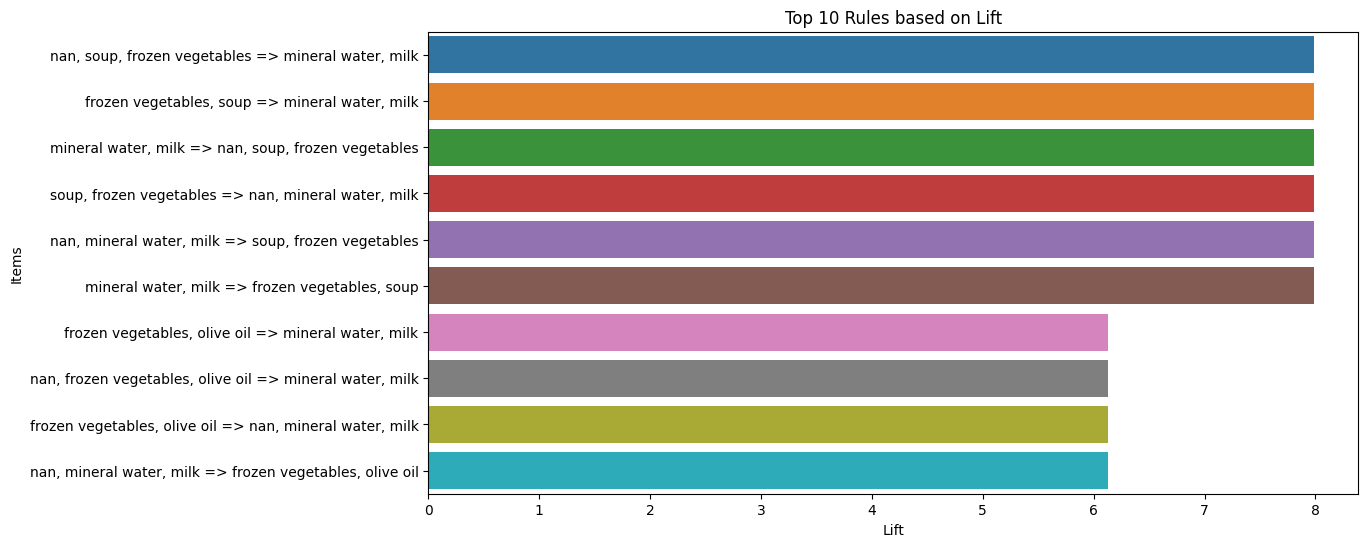

In [10]:
# Visualizing the results
# Display the top 10 rules based on lift
top_rules_lift = rules.sort_values(by='lift', ascending=False).head(10)
print(top_rules_lift)

# Visualize the top 10 rules based on lift
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rules_lift['lift'], y=top_rules_lift['antecedents'].apply(lambda x: ', '.join(x)).astype(str) + ' => ' + top_rules_lift['consequents'].apply(lambda x: ', '.join(x)).astype(str))
plt.title('Top 10 Rules based on Lift')
plt.xlabel('Lift')
plt.ylabel('Items')
plt.show()